In [1]:
import astropy
from astropy.io import ascii
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt


In [2]:
sp1 = ascii.read("../../../reduccion/NGC1313/cal/slit1_ascii.txt")
print(sp1)

      col1           col2   
---------------- -----------
4024.00463867189   0.2809365
4025.50053572656   0.1263353
4026.99643278123   0.6645973
 4028.4923298359   0.2400979
4029.98822689057   0.4354501
4031.48412394525 -0.03192461
4032.98002099992   0.2785238
4034.47591805459   0.2410768
4035.97181510926   0.3245422
4037.46771216393   0.3363686
             ...         ...
7349.38379120828  0.07615397
7350.87968826295  0.07790677
7352.37558531762  0.07631195
7353.87148237229  0.07529981
7355.36737942697  0.07321899
7356.86327648164  0.07274434
7358.35917353631  0.06967138
7359.85507059098  0.07259004
7361.35096764566  0.07287291
7362.84686470033  0.07423379
  7364.342761755  0.06625135
Length = 2234 rows


In [3]:
# renombrar las columnas
sp1['col1'].name = 'wavelength'
sp1['col2'].name = "flux"
sp1



wavelength,flux
float64,float64
4024.00463867189,0.2809365
4025.50053572656,0.1263353
4026.99643278123,0.6645973
4028.4923298359,0.2400979
4029.98822689057,0.4354501
4031.48412394525,-0.03192461
4032.98002099992,0.2785238
4034.47591805459,0.2410768
4035.97181510926,0.3245422


In [4]:
wave = sp1["wavelength"]
flux = sp1["flux"]
wave.data

array([4024.00463867, 4025.50053573, 4026.99643278, ..., 7361.35096765,
       7362.8468647 , 7364.34276175])

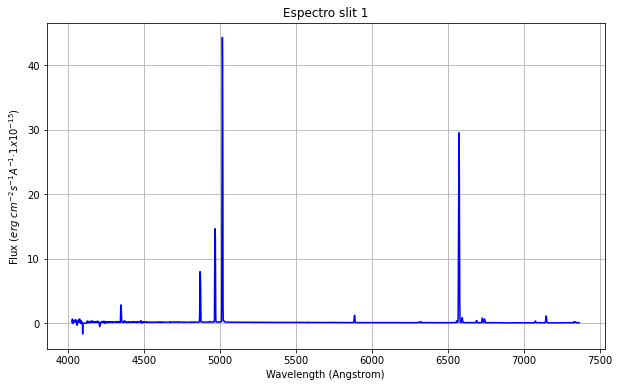

In [5]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave, flux, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1')
plt.grid(True)
plt.show()

In [6]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave3
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave_ccm89 = extinction.ccm89(wave, 0.299, 3.1)
print(f' extinción en magnitudes para slit 1 con ccm89: {wave_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave_f99 = extinction.fitzpatrick99(wave, 0.299, 3.1)
print(f' extinción en magnitudes para slit 1 con f99: {wave_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave_fm07 = extinction.fm07(wave, 0.299)
print(f' extinción en magnitudes para slit 1 con fm07: {wave_fm07}')

 extinción en magnitudes para slit 1 con ccm89: [0.43563222 0.43548925 0.43534611 ... 0.2074851  0.20741561 0.20734611]
 extinción en magnitudes para slit 1 con f99: [0.42348602 0.4233575  0.42322902 ... 0.18983148 0.18976888 0.18970631]
 extinción en magnitudes para slit 1 con fm07: [0.42440037 0.42426886 0.42413734 ... 0.18972868 0.18966116 0.18959367]


In [7]:
from extinction import ccm89, fm07, fitzpatrick99, remove

#print(f'valor de flujo original: {flux}')

# "deredden" flux by A_V = 0.299 with CCM89
flux_ccm89 = remove(ccm89(wave, 0.299, 3.1), flux)
print(f'valor de flujo deredden para slit 1 con ccm89: {flux_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux_f99 = remove(fitzpatrick99(wave, 0.299, 3.1), flux)
print(f'valor de flujo deredden para slit 1 con f99: {flux_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux_fm07 = remove(fm07(wave, 0.299), flux)
print(f'valor de flujo deredden para slit 1 con fm07: {flux_fm07}')





valor de flujo deredden para slit 1 con ccm89:         flux        
--------------------
   0.419624711988652
  0.1886776316615044
  0.9924234429496577
 0.35848375148523387
  0.6500729748121912
-0.04765317604363402
 0.41569138820298773
 0.35975474426794696
  0.4842444092702112
   0.501823675208466
                 ...
  0.0922378200745257
 0.09435477238509583
  0.0924173295843151
 0.09118574223207311
 0.08866025688198319
 0.08807986797353064
 0.08435368445912148
  0.0878817867050669
 0.08821859851278625
 0.08986030257392069
 0.08019239370570143
Length = 2234 rows
valor de flujo deredden para slit 1 con f99:          flux        
---------------------
  0.41495650231049247
  0.18658112896227227
   0.9814093245671431
  0.35451008037995796
   0.6428760615403867
-0.047126274200829335
   0.4111009452768482
  0.35578714521030835
   0.4789108696154274
    0.496303870660187
                  ...
  0.09074565715077888
  0.09282893614267662
  0.09092338785371142
   0.0897122674164939
  0.0872281

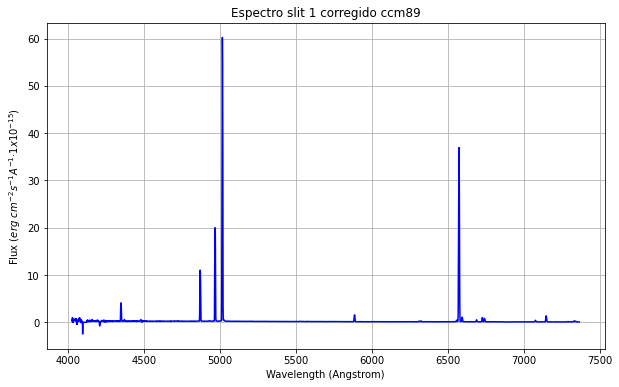

In [8]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave, flux_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1 corregido ccm89')
plt.grid(True)
plt.show()

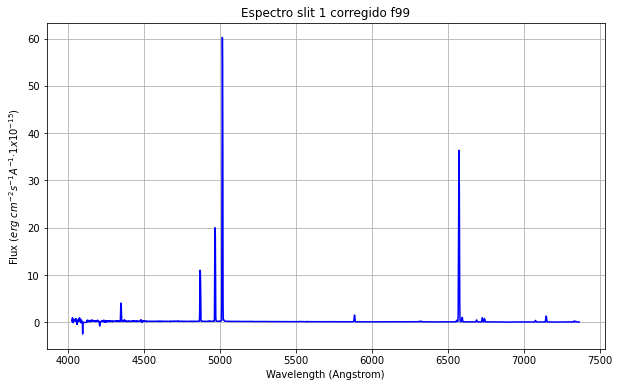

In [9]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave, flux_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1 corregido f99')
plt.grid(True)
plt.show()

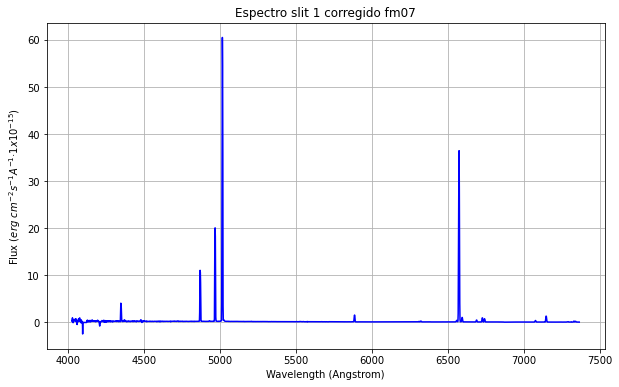

In [10]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave, flux_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1 corregido fm07')
plt.grid(True)
plt.show()

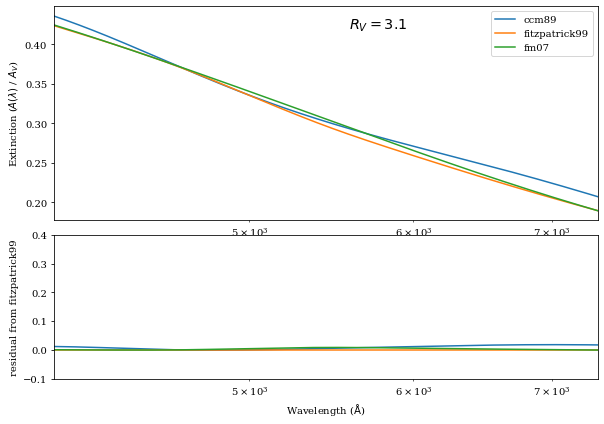

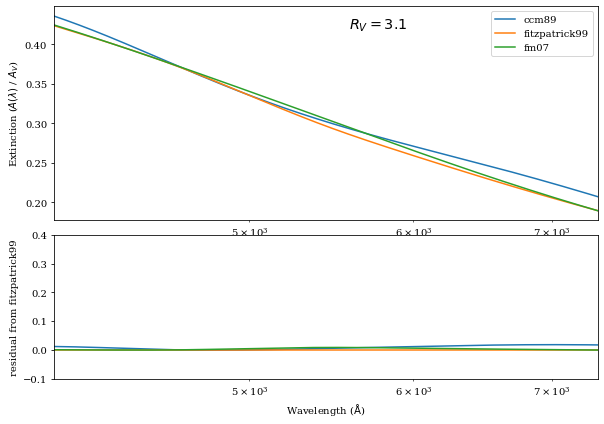

In [11]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda = {'ccm89': extinction.ccm89(wave, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave, 0.299, 3.1),
            'fm07': extinction.fm07(wave, 0.299)}
extinction_figure(wave, a_lambda, 'fitzpatrick99')

In [12]:
resta_f99 = flux_f99 - flux
resta_f99

0.1340200023104925
0.06024582896227226
0.3168120245671432
0.11441218037995796
0.20742596154038667
-0.015201664200829336
0.13257714527684822
0.11471034521030835
0.1543686696154274
0.15993527066018698
0.20371119398649118


In [13]:
resta_ccm89 = flux_ccm89 - flux
resta_ccm89

0.138688211988652
0.06234233166150438
0.32782614294965773
0.11838585148523387
0.21462287481219117
-0.01572856604363402
0.13716758820298774
0.11867794426794695
0.15970220927021117
0.16545507520846603
0.2107339783083786


SLIT 3

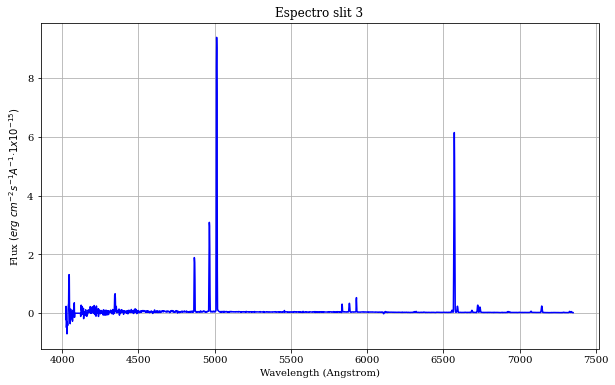

In [14]:
sp3 = ascii.read("../../../reduccion/NGC1313/cal/slit3_ascii.txt")
#print(sp1)

# renombrar las columnas
sp3['col1'].name = 'wavelength'
sp3['col2'].name = "flux"
#sp3

wave3 = sp3["wavelength"]
flux3 = sp3["flux"]
#wave3.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3')
plt.grid(True)
plt.show()


In [15]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave3
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave3_ccm89 = extinction.ccm89(wave3, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave3_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave3_f99 = extinction.fitzpatrick99(wave3, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave3_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave3_fm07 = extinction.fm07(wave3, 0.299)
print(f' extinción en magnitudes con fm07: {wave3_fm07}')



 extinción en magnitudes con ccm89: [0.4355478  0.43540474 0.4352615  ... 0.20808301 0.20801349 0.20794397]
 extinción en magnitudes con f99: [0.42341011 0.42328162 0.42315317 ... 0.19037104 0.19030821 0.19024541]
 extinción en magnitudes con fm07: [0.4243227  0.42419119 0.42405968 ... 0.19031071 0.19024293 0.19017518]


In [16]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux3}')

# "deredden" flux by A_V = 0.299 with CCM89
flux3_ccm89 = remove(ccm89(wave3, 0.299, 3.1), flux3)
print(f'valor de flujo deredden para slit 3 con ccm89: {flux3_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux3_f99 = remove(fitzpatrick99(wave3, 0.299, 3.1), flux3)
print(f'valor de flujo deredden para slit 3 con f99: {flux3_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux3_fm07 = remove(fm07(wave3, 0.299), flux3)
print(f'valor de flujo deredden para slit 3 con fm07: {flux3_fm07}')





valor de flujo original:    flux   
----------
-0.2112266
 0.2330359
-0.4803878
-0.4864286
-0.3252909
-0.7021431
-0.3023716
  -0.35929
-0.4184081
-0.3118795
       ...
0.04386516
0.05465405
0.05775708
0.05132952
0.03664066
0.02717597
0.01952718
 0.0226147
0.02420557
0.02303245
 0.0214294
Length = 2225 rows
valor de flujo deredden para slit 3 con ccm89:         flux        
--------------------
 -0.3154770183175853
  0.3480043920461307
 -0.7172929616148622
 -0.7262168775101272
 -0.4855810357688834
 -1.0479919180223825
-0.45124845537828046
 -0.5361202616564194
 -0.6242513166784527
-0.46525220200516915
                 ...
 0.05315883171115371
   0.066229311831936
  0.0699850545144332
 0.06219270761377953
 0.04439230908882298
 0.03292317341409054
0.023655294171872124
0.027393772472082113
0.029318957119414485
0.027896231186269382
0.025953002068138567
Length = 2225 rows
valor de flujo deredden para slit 3 con f99:         flux        
--------------------
 -0.3119698692135987
  0.3441402573

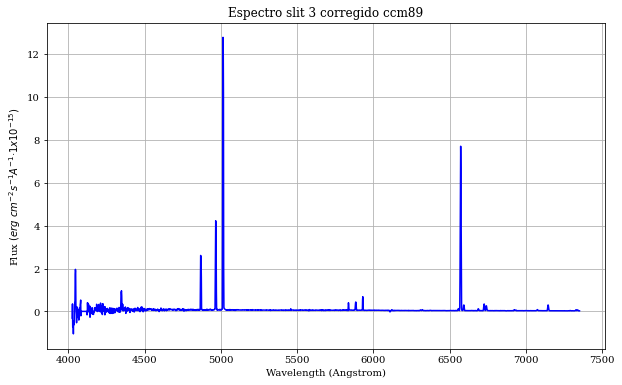

In [17]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3 corregido ccm89')
plt.grid(True)
plt.show()

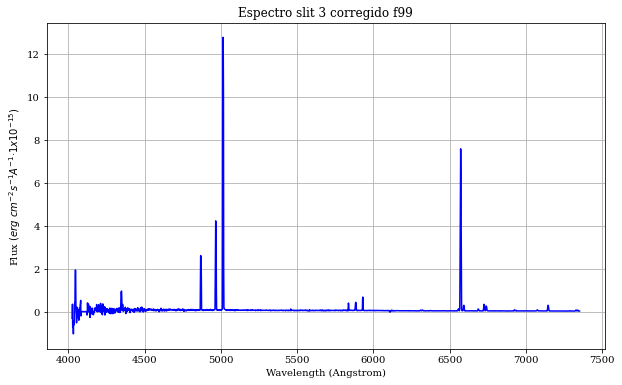

In [18]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3 corregido f99')
plt.grid(True)
plt.show()

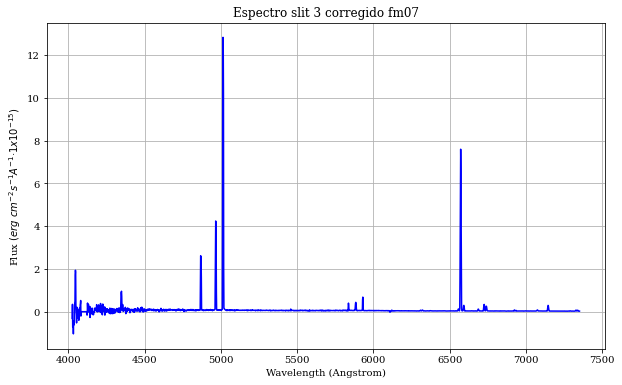

In [19]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3 corregido fm07')
plt.grid(True)
plt.show()

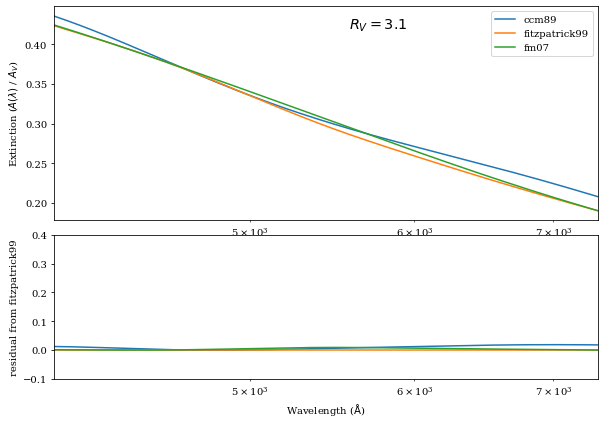

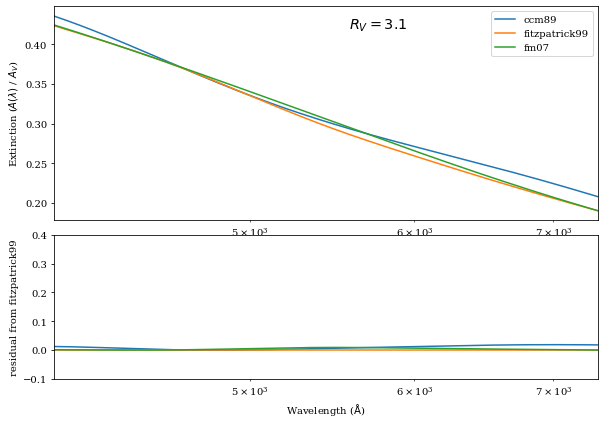

In [20]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda = {'ccm89': extinction.ccm89(wave3, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave3, 0.299, 3.1),
            'fm07': extinction.fm07(wave3, 0.299)}
extinction_figure(wave3, a_lambda, 'fitzpatrick99')

SLIT 5

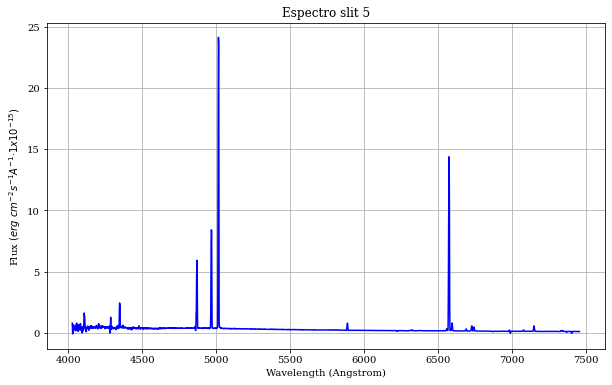

In [21]:
sp5 = ascii.read("../../../reduccion/NGC1313/cal/slit5_ascii.txt")
#print(sp1)

# renombrar las columnas
sp5['col1'].name = 'wavelength'
sp5['col2'].name = "flux"
#sp3

wave5 = sp5["wavelength"]
flux5 = sp5["flux"]
#wave3.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave5, flux5, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 5')
plt.grid(True)
plt.show()